In [1]:
import os
os.chdir('./backend/app')

[INFO] loading EAST text detector...
[INFO] text detection took 0.407996 seconds


<Figure size 432x288 with 0 Axes>

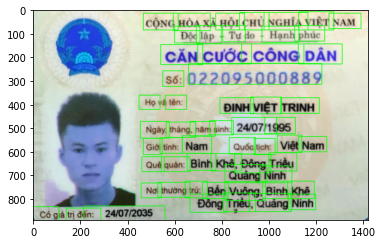

new-nopading:  0 844 97 927


In [2]:
from helpers.east_opencv import EAST
from helpers import image_utils
from pprint import pprint
import cv2

import matplotlib.pyplot as plt
plt.figure()


east = EAST(east_path = './models/east-opencv/frozen_east_text_detection.pb')

giay_ra_vien = image_utils.load_datasets('../../datasets/image_classify/train/giay_ra_vien/')
giay_phep_lai_xe = image_utils.load_datasets('../../datasets/image_classify/train/giay_phep_lai_xe/')
can_cuoc = image_utils.load_datasets('../../datasets/image_classify/train/can_cuoc/')
cv = image_utils.load_datasets('../../datasets/image_classify/train/cv/')
cavet_xe_may = image_utils.load_datasets('../../datasets/image_classify/train/cavet_xe_may/')
bang_dai_hoc = image_utils.load_datasets('../../datasets/image_classify/train/bang_dai_hoc/')

for item in can_cuoc[1:]:
    image = image_utils.load(item)
#     image = image_utils.pre_process_no_skew(image)
#     image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    show = image.copy()
    rects, confidences, rW, rH = east.get_text(image)
    draw = east.draw_box(show, rects, confidences, rW, rH)
    plt.imshow(draw)
    plt.show()
    list_roi = east.text_roi_sort(image, rects, confidences, rW, rH)
#     print(list_roi)
    break

In [33]:
import re
def text_cleaner(text):
    rules = [
        {r'>\s+': u'>'},  # remove spaces after a tag opens or closes
        {r'\s+': u' '},  # replace consecutive spaces
        {r'\s*<br\s*/?>\s*': u'\n'},  # newline after a <br>
        {r'</(div)\s*>\s*': u'\n'},  # newline after </p> and </div> and <h1/>...
        {r'</(p|h\d)\s*>\s*': u'\n\n'},  # newline after </p> and </div> and <h1/>...
        {r'<head>.*<\s*(/head|body)[^>]*>': u''},  # remove <head> to </head>
        {r'<a\s+href="([^"]+)"[^>]*>.*</a>': r'\1'},  # show links instead of texts
        {r'[ \t]*<[^<]*?/?>': u''},  # remove remaining tags
        {r'^\s+': u''},  # remove spaces at the beginning
    ]
    for rule in rules:
        for (k, v) in rule.items():
            regex = re.compile(k)
            text = regex.sub(v, text)
        text = text.rstrip()
    text = text.translate({ord(c): " " for c in "[@_!#$%^&*()<>?\|}{`~:.,;0123456789°ºð“ø.§®åÿ¥öï—›®+º«»©¶ß=’²\']/"})
    return text.lower()

texts = text_cleaner(list_roi)
print(texts)

qg wọlen  se cộng b axan ùngmĩay hnwguc tvi thu   uờng wêuý c ptspext  r stimi€te nồculuumu ttsineiies  a  trư ua b ủummcuy µë ủswesstri u nọck sc nferred cấp has c‹ bàng   ừ nhan thẻ d sadềnwinọ  ai kisitb asn quax t mnusisess  u yanđạt dsedīn vả tvanbar        webisiv   üje    sersec     ướ caswyī news  tr ớ   quái we sáp   sá ia  a          aekisà l weisswse l nấm    mhw    cac ius a y uy ss ausuaes s wumuzn wsiuim  


In [34]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokens = word_tokenize(texts)
print(tokens)

['qg', 'wọlen', 'se', 'cộng', 'b', 'axan', 'ùngmĩay', 'hnwguc', 'tvi', 'thu', 'uờng', 'wêuý', 'c', 'ptspext', 'r', 'stimi€te', 'nồculuumu', 'ttsineiies', 'a', 'trư', 'ua', 'b', 'ủummcuy', 'µë', 'ủswesstri', 'u', 'nọck', 'sc', 'nferred', 'cấp', 'has', 'c‹', 'bàng', 'ừ', 'nhan', 'thẻ', 'd', 'sadềnwinọ', 'ai', 'kisitb', 'asn', 'quax', 't', 'mnusisess', 'u', 'yanđạt', 'dsedīn', 'vả', 'tvanbar', 'webisiv', 'üje', 'sersec', 'ướ', 'caswyī', 'news', 'tr', 'ớ', 'quái', 'we', 'sáp', 'sá', 'ia', 'a', 'aekisà', 'l', 'weisswse', 'l', 'nấm', 'mhw', 'cac', 'ius', 'a', 'y', 'uy', 'ss', 'ausuaes', 's', 'wumuzn', 'wsiuim']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duyng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
def fix_tokens(tokens, STOPWORDS):
    tokens_end = []
    for item in tokens:
        if len(item) == 1 or len(item) > 15:
            continue
        if item in STOPWORDS:
            continue
        else:
            tokens_end.append(item)
    return tokens_end
STOPWORDS = set([
    '\\', '(', ')', ':', '.', ';', ',', '\\\\', '\\\\\\', '-', '%', '`', '—-', '?', '——', '--', '@',  '[', ']', '.....', '``', 'đụ', 'đéo',
    'cộng', 'hòa', 'xã', 'hội', 'chủ', 'nghĩa', 'việt', 'nam', 'độc', 'lập', 'tự', 'do', 'hạnh', 'phúc', 'bộ', 'gtvt', 'bọ', 'bỏ', 'bô'
    'hĩa', 'phỏ', 'chũ'
])
tokens = fix_tokens(tokens, STOPWORDS)
print(tokens)

['qg', 'wọlen', 'se', 'axan', 'ùngmĩay', 'hnwguc', 'tvi', 'thu', 'uờng', 'wêuý', 'ptspext', 'stimi€te', 'nồculuumu', 'ttsineiies', 'trư', 'ua', 'ủummcuy', 'µë', 'ủswesstri', 'nọck', 'sc', 'nferred', 'cấp', 'has', 'c‹', 'bàng', 'nhan', 'thẻ', 'sadềnwinọ', 'ai', 'kisitb', 'asn', 'quax', 'mnusisess', 'yanđạt', 'dsedīn', 'vả', 'tvanbar', 'webisiv', 'üje', 'sersec', 'ướ', 'caswyī', 'news', 'tr', 'quái', 'we', 'sáp', 'sá', 'ia', 'aekisà', 'weisswse', 'nấm', 'mhw', 'cac', 'ius', 'uy', 'ss', 'ausuaes', 'wumuzn', 'wsiuim']


In [ ]:
# -*- coding: utf-8 -*-
import argparse
import cv2
import numpy as np
from matplotlib import pyplot

def neighbours(x, y, image):
    """Return 8-neighbours of point p1 of picture, in clockwise order"""
    i = image
    x1, y1, x_1, y_1 = x+1, y-1, x-1, y+1
    return [i[y1][x],  i[y1][x1],   i[y][x1],  i[y_1][x1],  # P2,P3,P4,P5
            i[y_1][x], i[y_1][x_1], i[y][x_1], i[y1][x_1]]  # P6,P7,P8,P9


def transitions(neighbours):
    n = neighbours + neighbours[0:1]    # P2, ... P9, P2
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))


def zhangSuen(image):
    changing1 = changing2 = [(-1, -1)]
    while changing1 or changing2:
        # Step 1
        changing1 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2, P3, P4, P5, P6, P7, P8, P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P4 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P6 == 0 and   # Condition 3
                    transitions(n) == 1 and  # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing1.append((x, y))
        for x, y in changing1:
            image[y][x] = 0
        # Step 2
        changing2 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P2 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P8 == 0 and   # Condition 3
                    transitions(n) == 1 and  # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing2.append((x, y))
        for x, y in changing2:
            image[y][x] = 0
    return image * 255


for f in os.listdir("./worker/crop/samples/"):
    img = cv2.imread("./worker/crop/samples/"+f, 0 )
    break
retval, orig_thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
pyplot.imshow(orig_thresh)
pyplot.show()
bin_thresh = (orig_thresh == 0).astype(np.uint8)
after = zhangSuen(bin_thresh)
pyplot.imshow(after)
pyplot.show()